In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 99
warnings.filterwarnings('ignore')

## data 살펴보기

In [3]:
df = pd.read_excel('closetshare.xlsx')
df = df.rename(columns=str.lower)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [5]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [6]:
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


## 결측치

In [7]:
df.isna().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

In [8]:
# 팀 공통
# app_yn 값 0, 1 치환
df['app_yn'] = df['app_yn'].fillna(0)
df.loc[(df.app_yn == 'Y'), 'app_yn'] = 1

# brandnm
df['brandnm'] = df['brandnm'].fillna('N/A')

In [9]:
df.isna().sum()

brandnm       0
goodsnm       0
user          0
reg_date      5
order_date    0
p_type        0
sub_type      0
app_yn        0
dtype: int64

In [10]:
df[df['reg_date'].isna()]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,1
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,0
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,1
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,0
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,1


In [11]:
# user id는 가입일을 기준으로 부여된 것처럼 보인다.
df.sort_values('reg_date').head(20)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
356,Chloe,daria tote bag brown,a11612,2017-06-24,2021-01-18,7days,BA,1
305,Saint Laurent,classic tote bag black,a11803,2017-07-02,2021-01-20,4days,BA,1
1419,Balmain,button basic pattern wool doublebreasted-jacke...,a13637,2018-03-09,2021-03-03,4days,O,1
840,Louis Vuitton,monogram canvas clutch bag,a13741,2018-03-20,2021-03-31,4days,BA,1
39,Plastic Island,button flower pattern A-Line dress ivory,a13934,2018-03-27,2021-01-13,4days,D,1
303,JDC Lucky Chouette,button basic pattern jacket,a14083,2018-04-05,2021-01-21,7days,O,1
618,Mojosphine,peplum tweed pattern H-Line dress black,a14106,2018-04-07,2021-02-16,4days,D,1
617,Vivienne Westwood,herringbone pattern crop coat,a14106,2018-04-07,2021-02-16,4days,O,1
974,Dint,side pocket wedding dress ivory,a14279,2018-04-17,2021-03-25,4days,D,1
157,Escada,embroidery velvet jacket black,a14291,2018-04-19,2021-01-28,4days,O,1


In [12]:
df.sort_values('reg_date').tail(20)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
865,Cos,pocket basic pattern jacket beige,a1151437,2021-03-30,2021-03-31,4days,O,1
870,Thom Browne,basic pattern sweat-shirts grey,a1151404,2021-03-30,2021-03-30,4days,T,1
871,Gucci,GG marmont quilted-leather belt bag,a1151404,2021-03-30,2021-03-30,7days,BA,1
874,Yves Saint Laurent,chevron quilting cross bag black,a1151433,2021-03-30,2021-03-30,4days,BA,0
877,Saint Laurent,leather tassel cross body bag gray,a1151413,2021-03-30,2021-03-30,4days,BA,1
880,Imvely,ruffle flower pattern A-Line dress,a1151410,2021-03-30,2021-03-30,4days,D,1
881,Since then,gather flower pattern A-Line dress burgundy,a1151410,2021-03-30,2021-03-30,4days,D,1
882,& Other Stories,ribbon flower pattern A-Line dress multi,a1151410,2021-03-30,2021-03-30,4days,D,1
856,Nain,wrap detail coat beige,a1151465,2021-03-31,2021-03-31,7days,O,0
854,Gucci,GG supreme clutch brown,a1151499,2021-03-31,2021-03-31,4days,BA,1


In [13]:
df

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,0
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,0
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,1
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,1
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,1
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,1
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,1


In [14]:
# 그러면 찾아서 넣을 수 있지 않을가?
# 1144008
# 1142855
# 1146490
# 1145478
# 1149094

In [15]:
df['user_id'] = 0

for i in range(len(df)):
    df['user_id'][i] = df['user'][i][1:]

In [16]:
df['user_id'] = df['user_id'].astype(int)

In [17]:
df.sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
356,Chloe,daria tote bag brown,a11612,2017-06-24,2021-01-18,7days,BA,1,11612
305,Saint Laurent,classic tote bag black,a11803,2017-07-02,2021-01-20,4days,BA,1,11803
1419,Balmain,button basic pattern wool doublebreasted-jacke...,a13637,2018-03-09,2021-03-03,4days,O,1,13637
840,Louis Vuitton,monogram canvas clutch bag,a13741,2018-03-20,2021-03-31,4days,BA,1,13741
39,Plastic Island,button flower pattern A-Line dress ivory,a13934,2018-03-27,2021-01-13,4days,D,1,13934
...,...,...,...,...,...,...,...,...,...
858,Burberry,button basic pattern wool cardigan grey,a1151479,2021-03-31,2021-03-31,4days,O,1,1151479
857,Theory,pocket basic pattern skirt white,a1151481,2021-03-31,2021-03-31,4days,B,1,1151481
848,Gucci,graphics pattern sweat-shirts ivory,a1151496,2021-03-31,2021-03-31,7days,T,1,1151496
854,Gucci,GG supreme clutch brown,a1151499,2021-03-31,2021-03-31,4days,BA,1,1151499


In [18]:
# 1144008 : 2021-01-21
df.query('user_id > 1143930 and user_id < 1144050').sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
299,Mulberry,lily bag brown multi,a1143945,2021-01-21,2021-01-21,4days,BA,0,1143945
291,ACNE STUDIOS,basic pattern sweater navy,a1143946,2021-01-21,2021-01-21,7days,T,1,1143946
288,Louis Vuitton,logo chain tote bag black,a1143948,2021-01-21,2021-01-21,4days,BA,1,1143948
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,1,1144008
262,Prada,small logo classic two way bag black,a1144011,2021-01-21,2021-01-22,4days,BA,1,1144011
263,Saint Laurent,chevron clutch black,a1144042,2021-01-22,2021-01-22,7days,BA,1,1144042
261,Yves Saint Laurent,monogram envelope chain cross bag,a1144045,2021-01-22,2021-01-22,4days,BA,1,1144045


In [19]:
# 1142855 : 2021-01-13 or 2020-01-14
df.query('user_id > 1142800 and user_id < 1143000').sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
18,The Izzat,check pattern double breasted coat gray,a1142834,2021-01-13,2021-01-14,4days,O,1,1142834
271,Burberry,belt check pattern trench-coat beige,a1142838,2021-01-13,2021-01-21,7days,O,1,1142838
33,Bottega Veneta,intrecciato clutch bag black 2,a1142841,2021-01-13,2021-01-14,4days,BA,1,1142841
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,0,1142855
310,Gucci,marmont GG logo quilted bag black,a1142902,2021-01-14,2021-01-20,4days,BA,1,1142902
138,Nike,pocket basic pattern fitness-jacket pink,a1142914,2021-01-14,2021-01-31,7days,O,1,1142914
934,Yves Saint Laurent,kate small monogram bag beige,a1142920,2021-01-14,2021-03-26,7days,BA,1,1142920
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,1,1142921
17,Time,pocket basic pattern coat black,a1142921,2021-01-14,2021-01-14,4days,O,1,1142921
30,Prada,quilted cross body bag black,a1142924,2021-01-14,2021-01-14,4days,BA,1,1142924


In [20]:
# 1146490 : 2021-02-15
df.query('user_id > 1146450 and user_id < 1146520').sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
606,Time,basic pattern H-Line dress blue,a1146453,2021-02-15,2021-02-16,4days,D,1,1146453
634,Prada,gradation color padding jumper,a1146458,2021-02-15,2021-02-15,7days,O,1,1146458
437,Diane von Furstenberg,wrap sleeveless dress,a1146459,2021-02-15,2021-02-25,4days,D,1,1146459
611,Gucci,mixed pattern ribbon jacket multi,a1146476,2021-02-15,2021-02-16,4days,T,1,1146476
598,Louis Vuitton,logo chain tote bag black,a1146489,2021-02-15,2021-02-16,4days,BA,0,1146489
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,1,1146490
609,Gucci,microssima emily mini bag black,a1146514,2021-02-15,2021-02-16,4days,BA,1,1146514
616,Burberry Brit,button check pattern shirts beige,a1146516,2021-02-15,2021-02-16,4days,T,1,1146516


In [21]:
# 1145478 : 2021-02-04
df.query('user_id > 1145450 and user_id < 1145500').sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
707,Yves Saint Laurent,kate small monogram bag beige,a1145459,2021-02-04,2021-02-06,4days,BA,1,1145459
751,thom browne,zipper clutch black,a1145467,2021-02-04,2021-02-04,4days,BA,0,1145467
719,Gucci,dionysus shoulder bag beige,a1145471,2021-02-04,2021-02-05,7days,BA,1,1145471
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,0,1145478
747,Saint Laurent,chevron quilted bag black,a1145479,2021-02-04,2021-02-04,4days,BA,0,1145479
475,Escada,button basic pattern sweater beige,a1145482,2021-02-04,2021-02-23,7days,T,1,1145482
736,Ralph Lauren,strap basic pattern wrap-coat black,a1145485,2021-02-04,2021-02-05,4days,O,1,1145485
708,Olive des Olive,ruffle tweed pattern blouse pink,a1145488,2021-02-04,2021-02-06,7days,T,1,1145488
739,Molliolli,button basic pattern fur-outer beige,a1145498,2021-02-04,2021-02-04,7days,O,0,1145498


In [22]:
# 1149094 : 2021-03-12
df.query('user_id > 1149050 and user_id < 1149150').sort_values('user_id')

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,user_id
1013,Ruhm,button check pattern H-Line jumper-dress grey,a1149051,2021-03-12,2021-03-24,4days,D,1,1149051
1261,Gucci,dionysus cross bag black,a1149062,2021-03-12,2021-03-12,4days,BA,1,1149062
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,1,1149094
1234,Gucci,dionysus cross bag beige,a1149124,2021-03-12,2021-03-15,7days,BA,1,1149124
1251,Thom Browne,button stripe pattern wool cardigan black,a1149134,2021-03-12,2021-03-12,4days,O,1,1149134
1249,Yves Saint Laurent,monogram envelope chain cross bag,a1149135,2021-03-12,2021-03-13,7days,BA,1,1149135


In [23]:
df.query('user_id == 1149094')['reg_date']

1254   NaT
Name: reg_date, dtype: datetime64[ns]

In [24]:
df.loc[(df.user_id == 1144008), 'reg_date'] = pd.to_datetime('2021-01-21')
df.loc[(df.user_id == 1142855), 'reg_date'] = pd.to_datetime('2021-01-13') # 우선 13일로 추가
df.loc[(df.user_id == 1146490), 'reg_date'] = pd.to_datetime('2021-02-15')
df.loc[(df.user_id == 1145478), 'reg_date'] = pd.to_datetime('2021-02-04')
df.loc[(df.user_id == 1149094), 'reg_date'] = pd.to_datetime('2021-03-12')

In [25]:
# 결측치 처리 끝
df.isna().sum()

brandnm       0
goodsnm       0
user          0
reg_date      0
order_date    0
p_type        0
sub_type      0
app_yn        0
user_id       0
dtype: int64

## Feature Engineering

In [26]:
df['day'] = df['order_date'].dt.day
df['month'] = df['order_date'].dt.month
df['weekday'] = df['order_date'].dt.weekday
df['first'] = (df['order_date'] - df['reg_date']).dt.days
df['isfirst'] = np.where(df['first'].values <= 1, True, False)
df['level'] = np.where(df['first'].values == 0, '당일구매', np.where(df['first'].values == 1, '1일이내구매', np.where(df['first'].values < 7, '1주일이내구매', np.where(df['first'].values < 30, '1달이내구매', '1달경과후구매'))))

## EDA

In [27]:
# 1. 날짜별 판매량 변화 추이

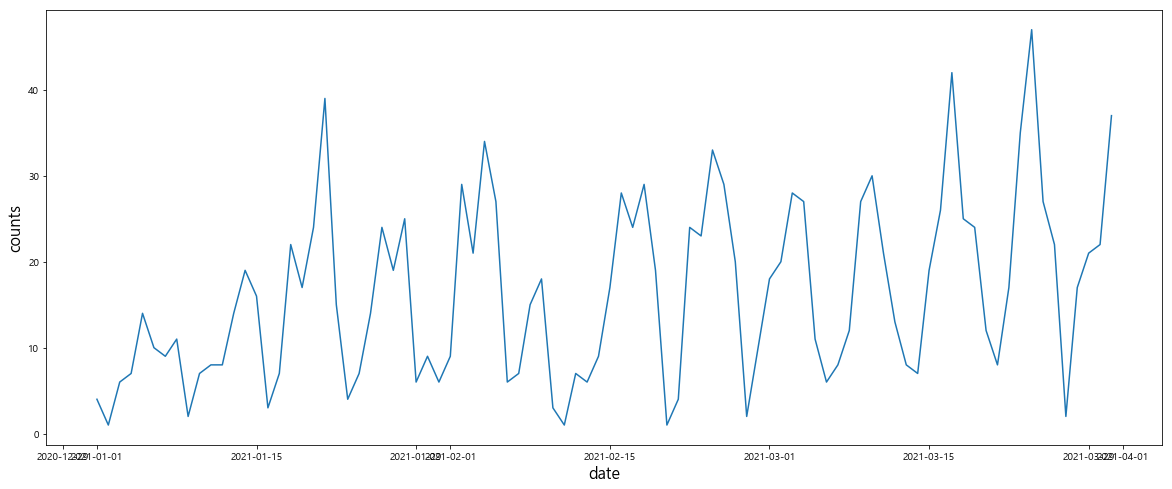

In [28]:
df_count = df.groupby('order_date')['user'].value_counts().groupby('order_date').sum().reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(data = df_count,
             x = df_count['order_date'], y = df_count['user'])
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.show()


In [29]:
# 2. 요일별 판매량 변화 추이

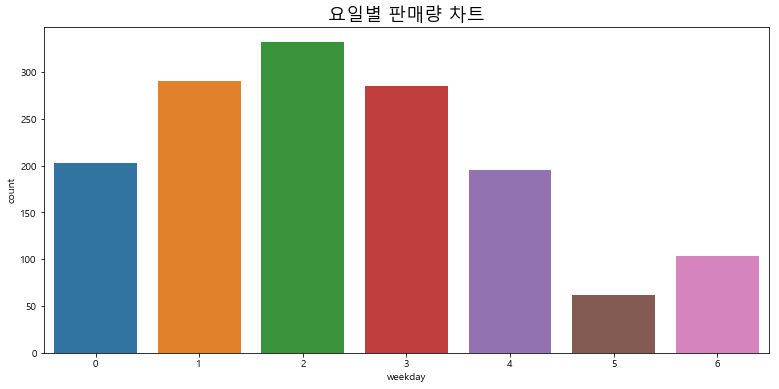

In [30]:
plt.figure(figsize=(13,6))
sns.countplot(data = df, x = 'weekday')
plt.title('요일별 판매량 차트', fontsize=18);


그래프를 보고 배송 날짜나 렌트 기간에 대해 궁금증이 생겨서 클로젯셰어 카톡 상담을 했는데, 내용은 다음과 같다.

1. 주문 시간에 따른 배송 안내

>서울 지역의 경우 오전 8시 주문 건까지 당일출고, 당일수령 (오후 2-7시 사이 당일수령) <br>
>경기/지방 지역은 오후 4시 주문 건까지 택배로 당일 출고되며 일요일 제외 1-2일 내 수령 가능합니다.
>
>모든 주문은 평일기준이며, 주말(토,일)/공휴일은 그 다음 평일에 출고 이루어 집니다.

2. 렌트 기간은 수령일 기준 or 구매일 기준?

>멤버십은 결제일부터 한달입니다. 1회권이라면 수령일 기준이 맞습니다!

3. 반납

>이용일 다음날 기사님 방문하여 받아갑니다. (주말제외)


정리하면 요일별 판매량은 화수목이 많은데 배송 + 반납 등을 고려했을 때 금요일, 토요일에 사용하기 위한 것으로 보여진다.


In [31]:
# order_date 분배
df['order_date'].sort_values()
# 1월 1일 ~ 3월 31일

135   2021-01-01
134   2021-01-01
133   2021-01-01
132   2021-01-01
131   2021-01-02
         ...    
856   2021-03-31
855   2021-03-31
854   2021-03-31
861   2021-03-31
849   2021-03-31
Name: order_date, Length: 1471, dtype: datetime64[ns]

In [32]:
# user와 order_date가 1:1 매칭인가요? 네
df.groupby(['user','order_date'], as_index=False).sum().value_counts().describe()

count   1234.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
dtype: float64

In [33]:
df['first'].value_counts()

0      352
1      147
3      119
2      107
5       32
      ... 
395      1
391      1
382      1
381      1
298      1
Name: first, Length: 324, dtype: int64

In [34]:
# 전체 1234명의 user
df['user'].unique().shape

(1234,)

In [35]:
# 가입 1일 이내 전환 유저 499명
df.query('first <= 1').shape

(499, 15)

In [36]:
# 약 40%가 가입 후 1일 이내 구매 전환 유저
499 / 1234

0.40437601296596437

In [37]:
# 월별 1일 이내 구매 전환 유저는?
df_first = df.query('first <= 1').groupby('month')['first'].value_counts().groupby('month').sum().reset_index()
df_first

,month,first
0,1,88
1,2,182
2,3,229


In [38]:
# 월별 전체 구매 유저는?
df_all = df.groupby('month')['first'].value_counts().groupby('month').sum().reset_index()
df_all = df_all.rename(columns = {'first': 'all'}, inplace = False)
df_all

,month,all
0,1,377
1,2,455
2,3,639


In [39]:
df_fa = pd.concat([df_first, df_all['all']], axis = 1)
df_fa

,month,first,all
0,1,88,377
1,2,182,455
2,3,229,639


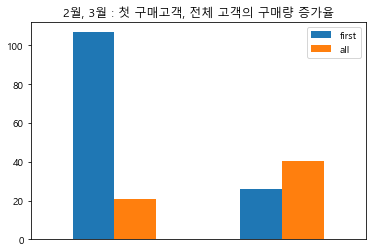

In [40]:
# 3. 2월, 3월의 첫 구매고객, 전체 고객의 구매량 증가율
(df_fa.pct_change()*100)[['first', 'all']].dropna().plot(kind = 'bar', rot = 0)
plt.xticks(np.arange(2, 3))
plt.title('2월, 3월 : 첫 구매고객, 전체 고객의 구매량 증가율');

In [41]:
#            2월   3월
# 1일이내   106     25.8
# 전체      20.7   40.4  (단위 : %)

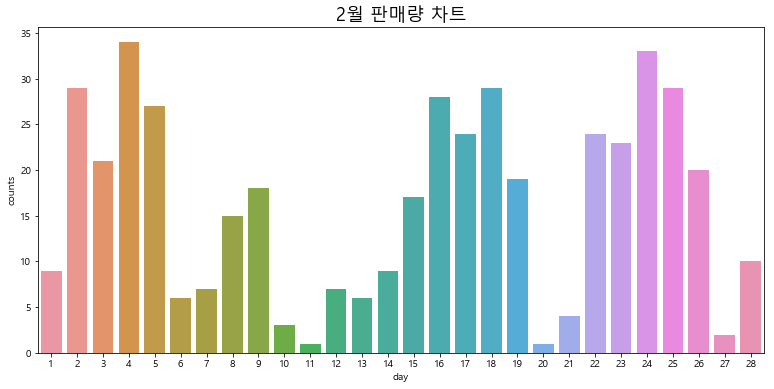

In [42]:
# 첫 구매 고객이 2월에 급증했다.. 그 이유는?
plt.figure(figsize=(13,6))
sns.barplot(data = df.query('month==2').groupby('day')['user'].value_counts().groupby('day').sum().reset_index(), 
         x = 'day', y = 'user')
plt.ylabel('counts')
plt.title('2월 판매량 차트', fontsize=18);

# 날짜 데이터만 놓고 보면 잘 모르겠다. 할인행사를 진행했나?

In [43]:
df.query('month==2').groupby('app_yn')['user'].value_counts().groupby('app_yn').sum().reset_index()

,app_yn,user
0,0,47
1,1,408


In [44]:
df.query('month==2').groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().reset_index().sort_values('user', ascending = False).head(20)

,brandnm,user
51,Gucci,76
28,Chanel,37
99,Saint Laurent,31
64,Louis Vuitton,27
90,Prada,23
120,Yves Saint Laurent,14
110,Thom Browne,13
20,Burberry,12
47,Fendi,11
72,Max Mara,9


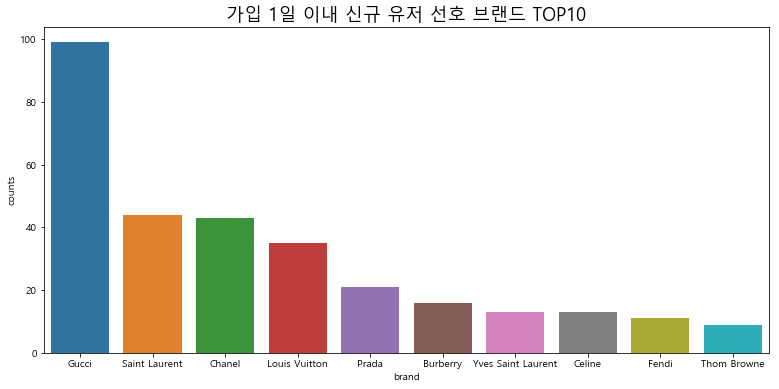

In [45]:
# 4. 신규 유저의 선호 브랜드는?
df_brand = df.query('isfirst == True')['brandnm'].value_counts().head(10).reset_index()
df_brand = df_brand.rename(columns = {'index': 'brand', 'brandnm':'counts'}, inplace = False)

plt.figure(figsize=(13,6))
sns.barplot(data = df_brand, 
         x = 'brand', y = 'counts')
plt.title('가입 1일 이내 신규 유저 선호 브랜드 TOP10', fontsize=18);

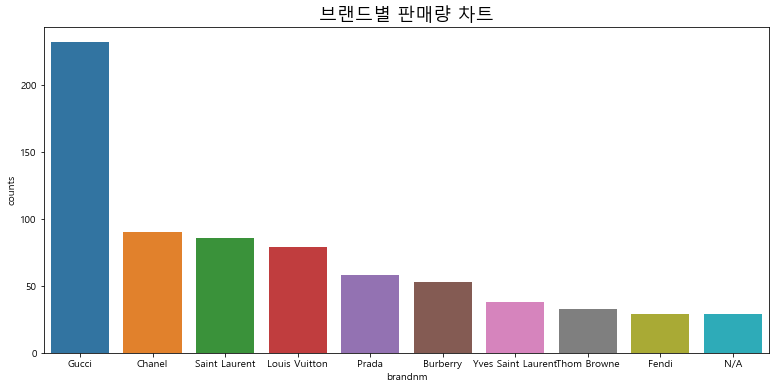

In [46]:
# 그럼 전체 유저가 가장 많이 구매한 브랜드는?
plt.figure(figsize=(13,6))
sns.barplot(data = df.groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().sort_values(ascending = False).reset_index().head(10),
           x = 'brandnm', y = 'user')
plt.ylabel('counts')
plt.title('브랜드별 판매량 차트', fontsize=18);


In [47]:
# 구찌, 샤넬, 생로랑, 루이비통, 프라다, 버버리, 톰브라운, 펜디 등의 명품임
# 사람들이 뭔가 중요한 자리에 참석하기 위해, 또는 SNS 업로드를 위해 명품 하나 걸치고 싶을 때 렌트하는 듯
# 뭔가 명품 악세사리 렌탈 서비스로의 비즈니스 방향 전환도 생각해볼 수 있겠다.

내용 정리

1. 'TB'를 'TP'로 치환해야겠다고 정의했는데 그러면 안될 것 같다. 'Two Piece'의 약자가 아니라 T(상의) + B(하의) 의 약자인듯

2. reg_date의 NA값을 제거하지 않고 다른 날짜로 대체할 수 있을 것 같다.

3. 2월에 첫 구매 고객이 전월 대비 2배 급증했는데, 그 이유는 더 살펴봐야겠다.

4. 가입 후 구매 전환 날짜로 그룹핑한 level 컬럼에 대해선 좀더 살펴봐야겠다.